In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [2]:
dataset=pd.read_csv('heart.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.isnull().sum() # check the null values in each variable

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Exploratory Data Analysis

In [7]:
conti_feature=dataset[['age','trestbps','chol','thalach','oldpeak']] # list of all continuous variable

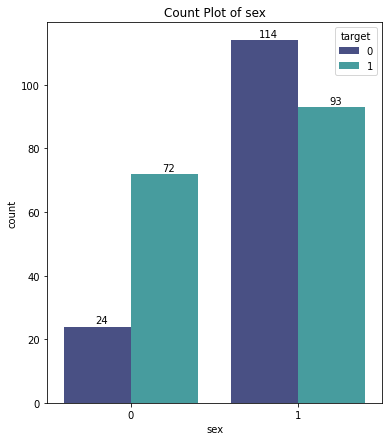

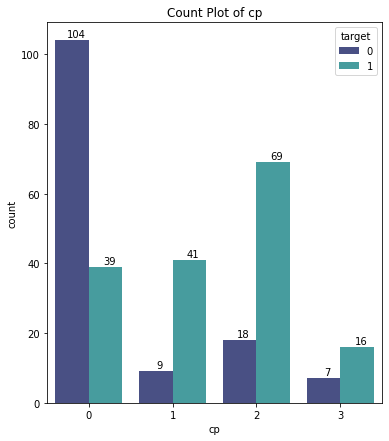

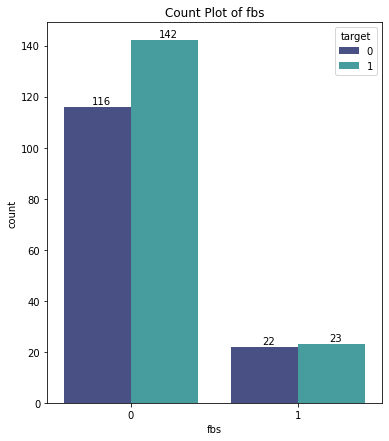

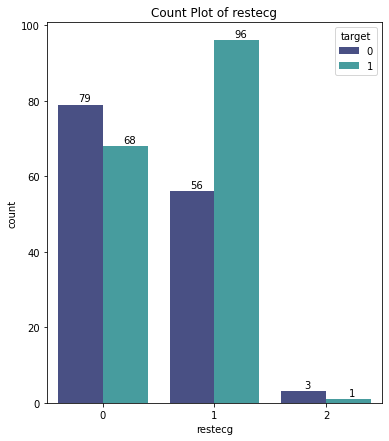

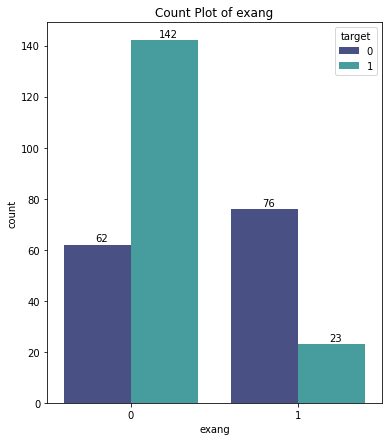

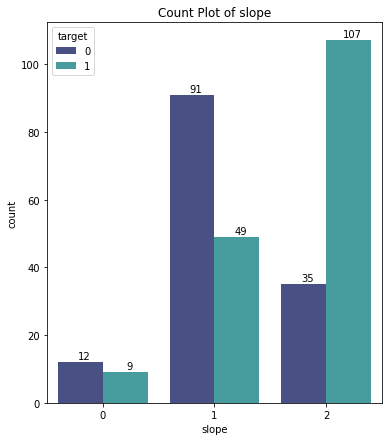

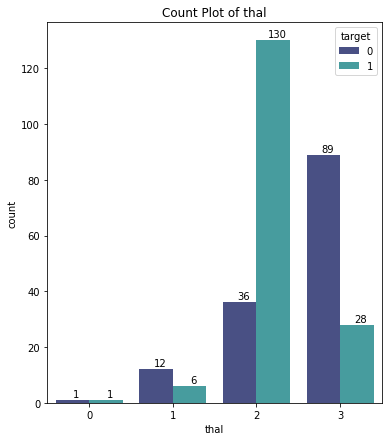

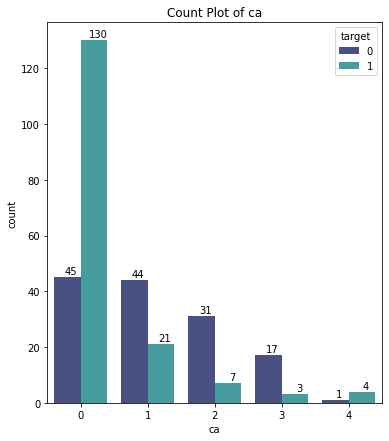

In [8]:
categorical_variable=dataset[['sex','cp','fbs','restecg','exang','slope','thal','ca']] # list of all categorical variable
for variable in categorical_variable:
    plt.figure(figsize=(6,7))
    bars=sns.countplot(data=categorical_variable,x=variable,hue=dataset['target'],palette='mako')
    for bar in bars.patches:
        bars.annotate(format(bar.get_height()),
                     (bar.get_x()+bar.get_width()/2.,bar.get_height()),
                     ha='center',va='center',
                     xytext=(4,6),
                     textcoords='offset points')
        plt.title("Count Plot of {}".format(variable))
        

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

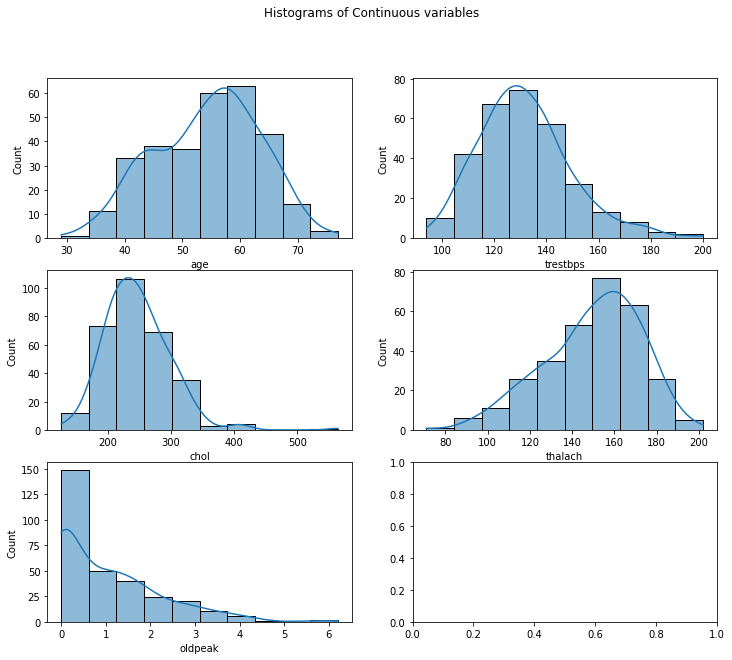

In [9]:
fig,axes=plt.subplots(3,2,figsize=(12,10))
fig.suptitle("Histograms of Continuous variables")
sns.histplot(ax=axes[0,0],data=dataset,x='age',kde=True,bins=10)
sns.histplot(ax=axes[0,1],data=dataset,x='trestbps',kde=True,bins=10)
sns.histplot(ax=axes[1,0],data=dataset,x='chol',kde=True,bins=10)
sns.histplot(ax=axes[1,1],data=dataset,x='thalach',kde=True,bins=10)
sns.histplot(ax=axes[2,0],data=dataset,x='oldpeak',kde=True,bins=10)

In [10]:
conti_feature.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

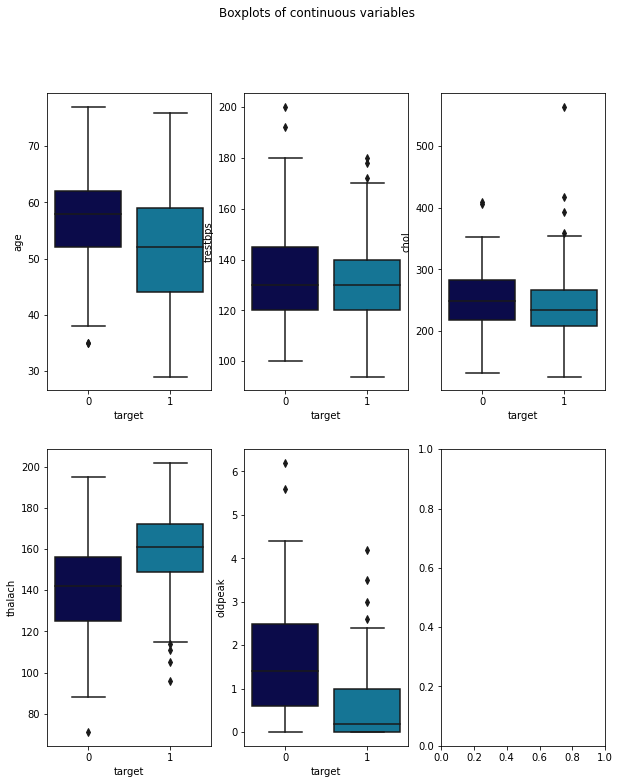

In [11]:
fig,axs=plt.subplots(2,3,figsize=(10,12))
fig.suptitle("Boxplots of continuous variables")

sns.boxplot(ax=axs[0,0],data=dataset,y=dataset['age'],x=dataset['target'],palette='ocean')
sns.boxplot(ax=axs[0,1],data=dataset,y=dataset['trestbps'],x=dataset['target'],palette='ocean')
sns.boxplot(ax=axs[0,2],data=dataset,y=dataset['chol'],x=dataset['target'],palette='ocean')
sns.boxplot(ax=axs[1,0],data=dataset,y=dataset['thalach'],x=dataset['target'],palette='ocean')
sns.boxplot(ax=axs[1,1],data=dataset,y=dataset['oldpeak'],x=dataset['target'],palette='ocean')

Winsorize is used to limit the extreme values in the dataset to reduce the effect of outliers.

In [12]:
winsorize_feature=conti_feature[['trestbps','chol','oldpeak']]

In [13]:
def variable_winsorize(data,lower,upper):
    for feature in data.columns:
        data[feature] = winsorize(a=data[feature],limits=[lower,upper], inplace=True)

In [14]:
variable_winsorize(winsorize_feature,0,0.2)

c:\users\shoba\anaconda3\envs\cancer\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='target', ylabel='oldpeak'>

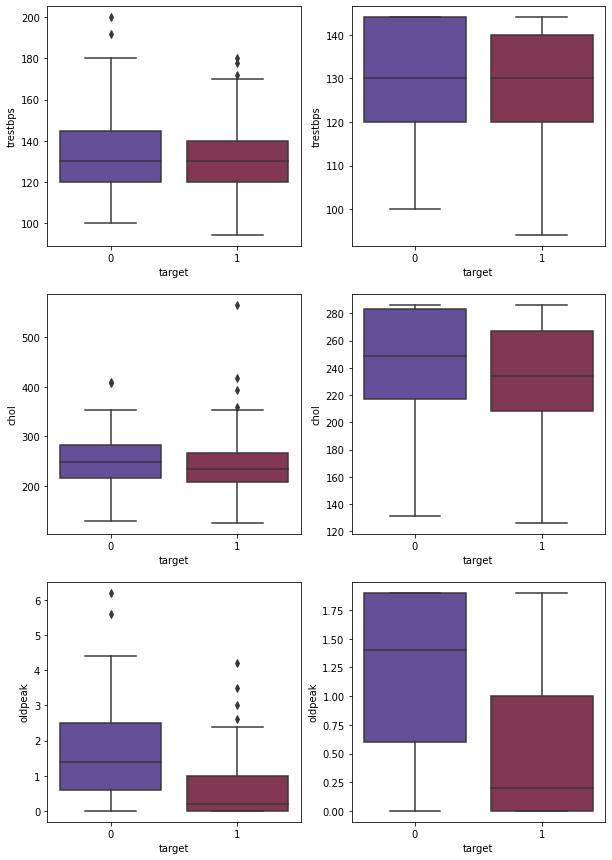

In [15]:
fig,axes=plt.subplots(3,2,figsize=(10,15))

sns.boxplot(ax=axes[0,0],data=conti_feature,x=dataset['target'],y='trestbps',palette='twilight')
sns.boxplot(ax=axes[0,1],data=winsorize_feature,x=dataset['target'],y='trestbps',palette='twilight')

sns.boxplot(ax=axes[1,0],data=conti_feature,x=dataset['target'],y='chol',palette='twilight')
sns.boxplot(ax=axes[1,1],data=winsorize_feature,x=dataset['target'],y='chol',palette='twilight')

sns.boxplot(ax=axes[2,0],data=conti_feature,x=dataset['target'],y='oldpeak',palette='twilight')
sns.boxplot(ax=axes[2,1],data=winsorize_feature,x=dataset['target'],y='oldpeak',palette='twilight')

<AxesSubplot:>

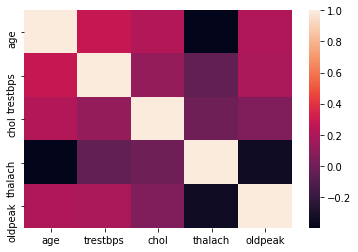

In [16]:
sns.heatmap(conti_feature.corr())# none of the continuous variables are highly correlated with other variables.

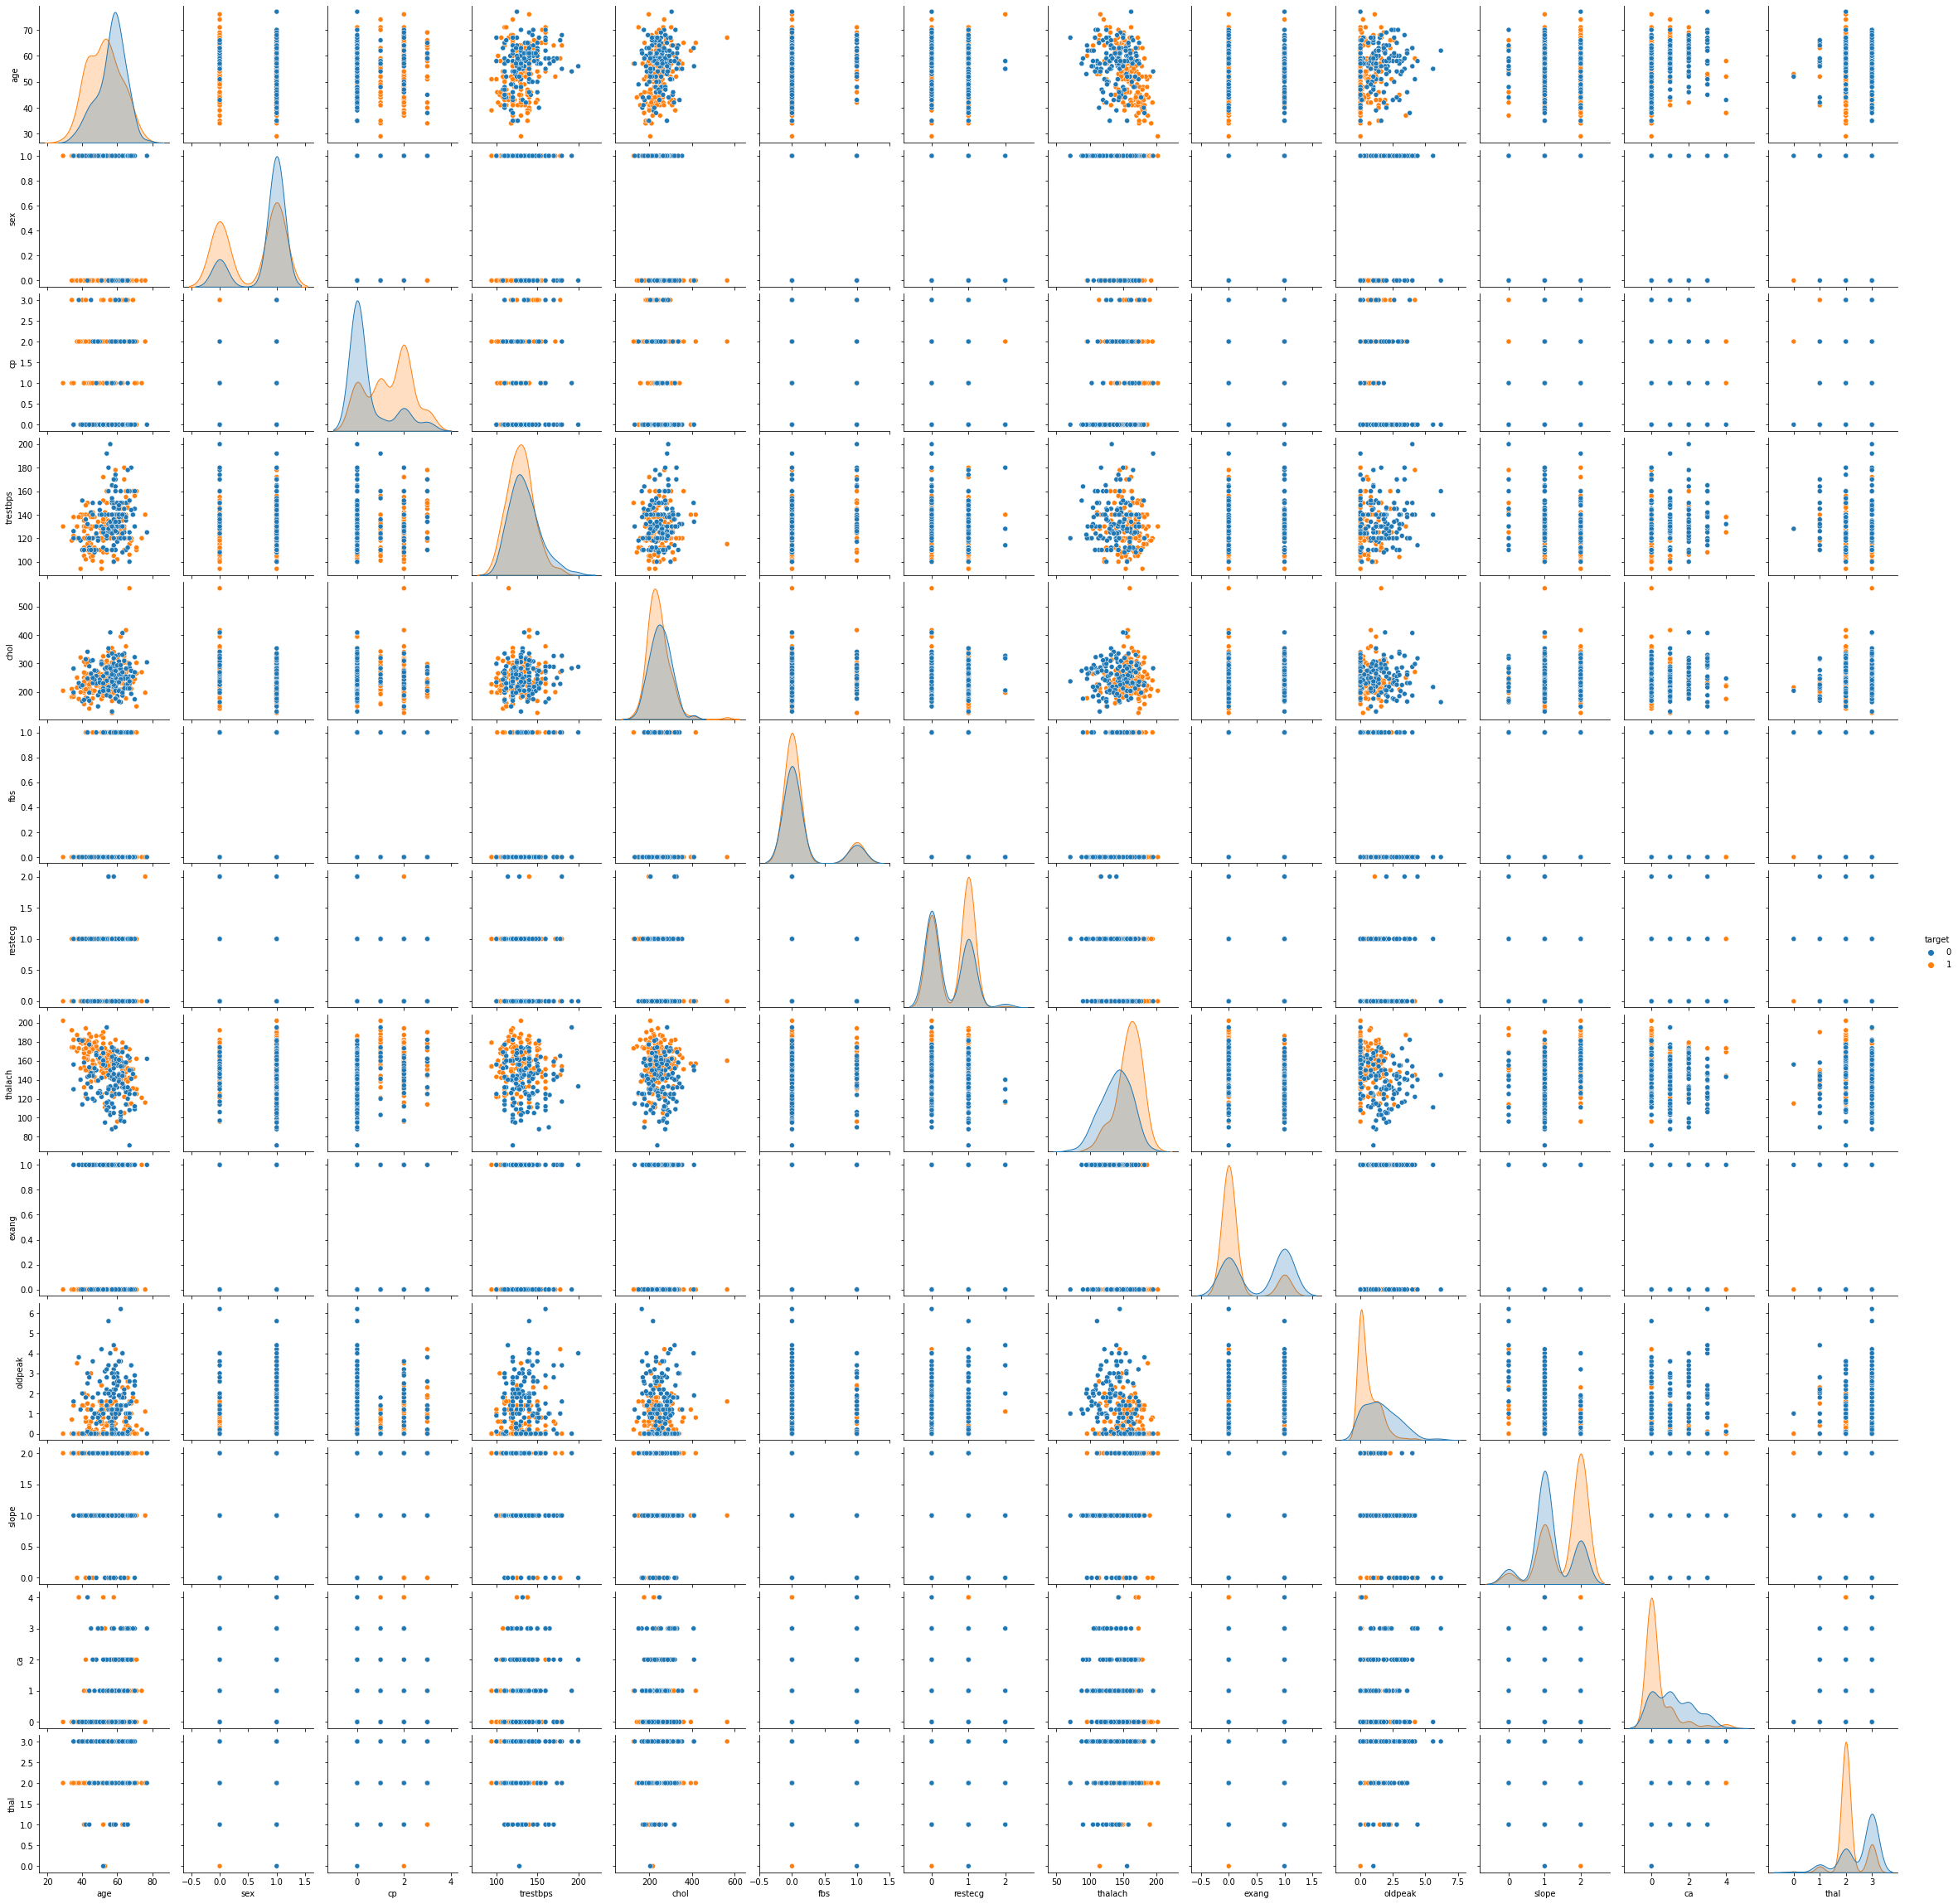

In [17]:
sns.pairplot(dataset,hue='target') # None of the pair of variables are linealy separable, so any algorithm which used for 
                                   #linearly separable is not suitable for this dataset

In [17]:
data=pd.concat([dataset[['target','age','thalach']],winsorize_feature[['trestbps','chol','oldpeak']],categorical_variable[['sex','cp','fbs','restecg','exang','slope','thal','ca']]],axis=1)
#Final dataset

In [18]:
df=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)
#Creating dummy variables for categoriacal features

In [19]:
df.head() 

,target,age,thalach,trestbps,chol,oldpeak,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,1,63,150,144,233,1.9,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,37,187,130,250,1.9,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,41,172,130,204,1.4,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,56,178,120,236,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,57,163,120,286,0.6,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [21]:
scaling=StandardScaler()
scaling_feature=['age','trestbps','chol','thalach','oldpeak']
df[scaling_feature]=scaling.fit_transform(df[scaling_feature])

In [22]:
x=df.drop(['target'],axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0,stratify=y)

In [24]:
knn=KNeighborsClassifier()
params=[{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50],
        'leaf_size':[1,2,3,4,5,6,7,8,9,10],
        'p':[1,2]}]
randomized_knn=RandomizedSearchCV(estimator=knn,param_distributions=params,n_iter=5,scoring='accuracy',random_state=0,cv=10,n_jobs=-1)

In [25]:
randomized_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions=[{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 15, 20, 30, 40,
                                                         50],
                                         'p': [1, 2]}],
                   random_state=0, scoring='accuracy')

In [26]:
yknn_predict=randomized_knn.predict(x_test)

In [27]:
accuracy_knn=accuracy_score(yknn_predict,y_test)

In [28]:
accuracy_knn # 80.23% of accuracy is achieved

0.8021978021978022

In [29]:
#Creating a Pickle file
import pickle
pickle_out=open("heart_randomized_knn.pkl","wb")
pickle.dump(randomized_knn,pickle_out)
pickle_out.close()